The CITY and COUNTRY tables are described as follows:
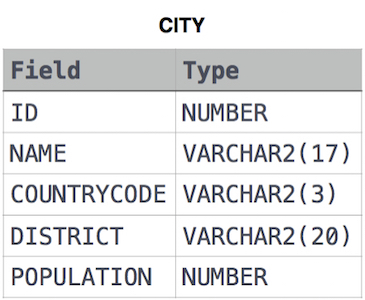
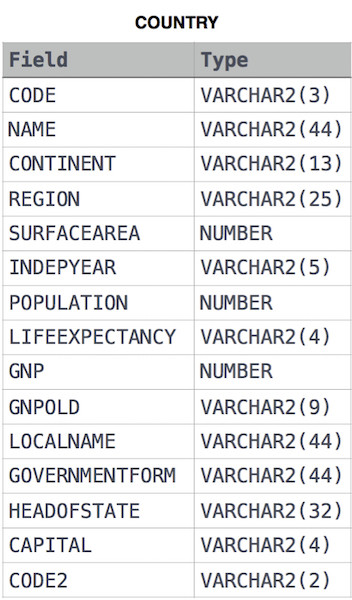

Note: CITY.CountryCode and COUNTRY.Code are matching key columns.

*** 
### Given the CITY and COUNTRY tables, query the sum of the populations of all cities where the CONTINENT is 'Asia'.

> `SELECT SUM(city.population)
FROM city
JOIN country ON city.countrycode = country.code
WHERE continent = 'Asia';`

### Given the CITY and COUNTRY tables, query the names of all cities where the CONTINENT is 'Africa'.

> `SELECT city.name
FROM city
JOIN country ON city.countrycode = country.code
WHERE continent = 'Africa';`


### Given the CITY and COUNTRY tables, query the names of all the continents (COUNTRY.Continent) and their respective average city populations (CITY.Population) rounded down to the nearest integer.

> `SELECT country.continent, FLOOR(AVG(city.population))
FROM country
JOIN city ON city.countrycode = country.code
GROUP BY country.continent;`

***

You are given two tables: Students and Grades. Students contains three columns ID, Name and Marks.
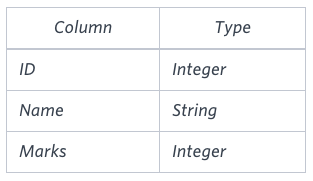


Grades contains the following data:
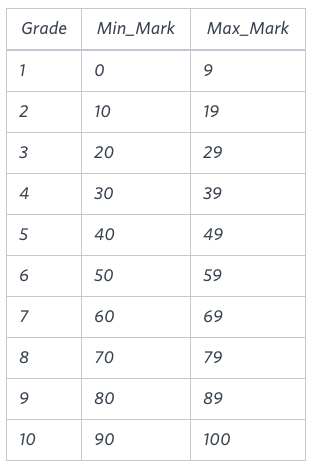

Ketty gives Eve a task to generate a report containing three columns: Name, Grade and Mark. Ketty doesn't want the NAMES of those students who received a grade lower than 8. The report must be in descending order by grade -- i.e. higher grades are entered first. If there is more than one student with the same grade (8-10) assigned to them, order those particular students by their name alphabetically. Finally, if the grade is lower than 8, use "NULL" as their name and list them by their grades in descending order. If there is more than one student with the same grade (1-7) assigned to them, order those particular students by their marks in ascending order.

Write a query to help Eve.

Sample Input:

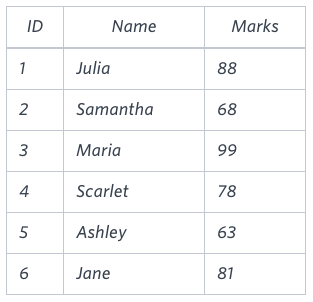


Sample Output:


`Maria 10 99
Jane 9 81
Julia 9 88 
Scarlet 8 78
NULL 7 63
NULL 7 68`

Note: Print "NULL"  as the name if the grade is less than 8.

Explanation: Consider the following table with the grades assigned to the students:
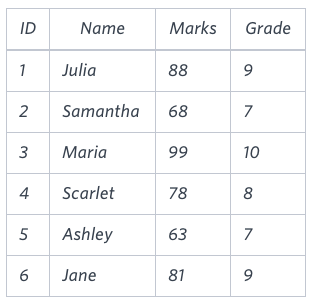


So, the following students got 8, 9 or 10 grades:

- Maria (grade 10)
- Jane (grade 9)
- Julia (grade 9)
- Scarlet (grade 8)

> `SELECT 
    CASE
        WHEN Grades.Grade > 7
        THEN Students.Name
        WHEN Grades.Grade <= 7
        THEN NULL
    END, 
    Grades.Grade, 
    Students.Marks 
FROM Students 
INNER JOIN Grades ON Students.Marks BETWEEN Grades.Min_Mark AND Max_Mark 
ORDER BY Grades.Grade DESC, Students.Name ASC, Students.Marks ASC;`

***

Julia just finished conducting a coding contest, and she needs your help assembling the leaderboard! Write a query to print the respective hacker_id and name of hackers who achieved full scores for more than one challenge. Order your output in descending order by the total number of challenges in which the hacker earned a full score. If more than one hacker received full scores in same number of challenges, then sort them by ascending hacker_id.

Input Format

The following tables contain contest data:

- Hackers: The hacker_id is the id of the hacker, and name is the name of the hacker.
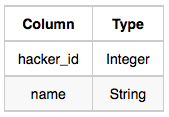

- Difficulty: The difficult_level is the level of difficulty of the challenge, and score is the score of the challenge for the difficulty level.
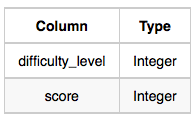

- Challenges: The challenge_id is the id of the challenge, the hacker_id is the id of the hacker who created the challenge, and difficulty_level is the level of difficulty of the challenge.
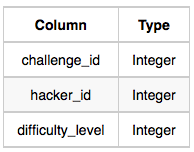

- Submissions: The submission_id is the id of the submission, hacker_id is the id of the hacker who made the submission, challenge_id is the id of the challenge that the submission belongs to, and score is the score of the submission.
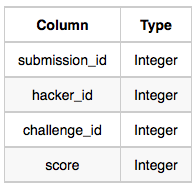

Sample Input

Hackers Table:
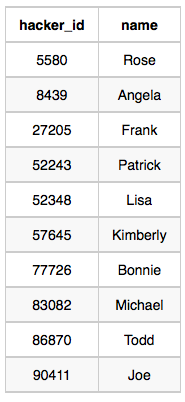

Difficulty Table:
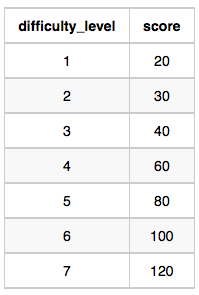

Challenges Table:
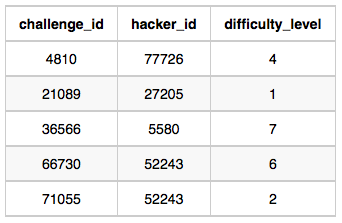

Submissions Table:
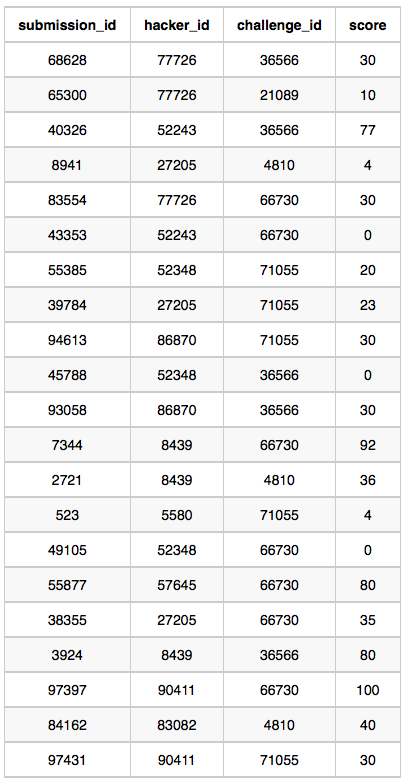

Sample Output

`90411 Joe`


Explanation

- Hacker 86870 got a score of 30 for challenge 71055 with a difficulty level of 2, so 86870 earned a full score for this challenge.

- Hacker 90411 got a score of 30 for challenge 71055 with a difficulty level of 2, so 90411 earned a full score for this challenge.

- Hacker 90411 got a score of 100 for challenge 66730 with a difficulty level of 6, so 90411 earned a full score for this challenge.

- Only hacker 90411 managed to earn a full score for more than one challenge, so we print the their hacker_id and name as 2 space-separated values.

> `SELECT h.hacker_id, h.name
FROM hackers h, challenges c, difficulty d, submissions s
WHERE h.hacker_id = s.hacker_id
    AND c.challenge_id = s.challenge_id
    AND c.difficulty_level = d.difficulty_level
    AND s.score = d.score
GROUP BY h.hacker_id, h.name 
HAVING COUNT(h.hacker_id) > 1
ORDER BY COUNT(c.challenge_id) DESC, h.hacker_id;`

***

Harry Potter and his friends are at Ollivander's with Ron, finally replacing Charlie's old broken wand.

Hermione decides the best way to choose is by determining the minimum number of gold galleons needed to buy each non-evil wand of high power and age. Write a query to print the id, age, coins_needed, and power of the wands that Ron's interested in, sorted in order of descending power. If more than one wand has same power, sort the result in order of descending age.

Input Format

The following tables contain data on the wands in Ollivander's inventory:

- Wands: The id is the id of the wand, code is the code of the wand, coins_needed is the total number of gold galleons needed to buy the wand, and power denotes the quality of the wand (the higher the power, the better the wand is).
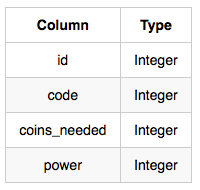

- Wands_Property: The code is the code of the wand, age is the age of the wand, and is_evil denotes whether the wand is good for the dark arts. If the value of is_evil is 0, it means that the wand is not evil. The mapping between code and age is one-one, meaning that if there are two pairs, (code1, age1) and (code2, age2), then (code1 does not equal code2) and (age1 does not equal age2).
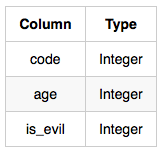

Sample Input

Wands Table:
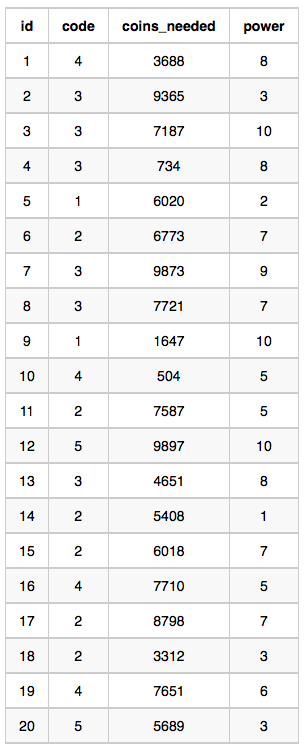

Wands_Property Table:
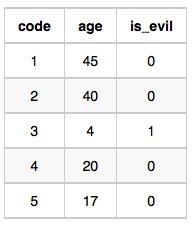


Sample Output

`9 45 1647 10
12 17 9897 10
1 20 3688 8
15 40 6018 7
19 20 7651 6
11 40 7587 5
10 20 504 5
18 40 3312 3
20 17 5689 3
5 45 6020 2
14 40 5408 1`

Explanation

The data for wands of age 45 (code 1):
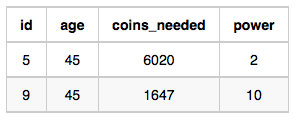

- The minimum number of galleons needed for 
    - wand(age = 45, power = 2) = 6020

- The minimum number of galleons needed for
    - want(age = 45, power = 10) = 1647
    
The data for wands of age 40 (code 2):
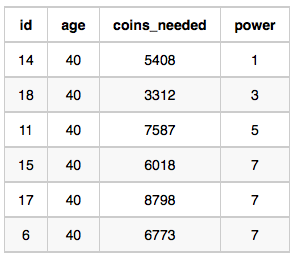

- The minimum number of galleons needed for 
    - wand(age = 40, power = 1) = 5408
- The minimum number of galleons needed for 
    - wand(age = 40, power = 3) = 3312
- The minimum number of galleons needed for 
    - wand(age = 40, power = 5) = 7587
- The minimum number of galleons needed for
    - wand(age=40, power = 7) = 6018

The data for wands of age 20 (code 4):
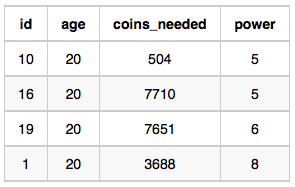

- The minimum number of galleons needed for 
    - wand(age = 20, power = 5) = 504
- The minimum number of galleons needed for 
    - wand(age = 20, power = 6) = 7651
- The minimum number of galleons needed for 
    - wand(age = 20, power = 8) = 3688

The data for wands of age 17 (code 5):
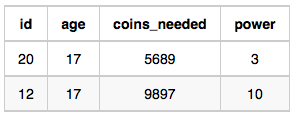

- The minimum number of galleons needed for 
    - wand(age = 17, power = 3) = 5689
- The minimum number of galleons needed for 
    - wand(age = 17, power = 10) = 9897
    
    
> `SELECT W.id, P.age, W.coins_needed, W.power
FROM WANDS AS W
    INNER JOIN WANDS_PROPERTY AS P ON W.code = P.code
WHERE P.is_evil = 0 AND W.coins_needed = 
    (SELECT MIN(coins_needed)
     FROM WANDS AS W1
     INNER JOIN WANDS_PROPERTY AS P1 ON W1.code = P1.code
     WHERE W1.power = W.power AND P1.age = P.age)
ORDER BY W.power DESC, P.age DESC;`

***

Julia asked her students to create some coding challenges. Write a query to print the hacker_id, name, and the total number of challenges created by each student. Sort your results by the total number of challenges in descending order. If more than one student created the same number of challenges, then sort the result by hacker_id. If more than one student created the same number of challenges and the count is less than the maximum number of challenges created, then exclude those students from the result.

Input Format

The following tables contain challenge data:

- Hackers: The hacker_id is the id of the hacker, and name is the name of the hacker.
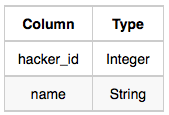

- Challenges: The challenge_id is the id of the challenge, and hacker_id is the id of the student who created the challenge.
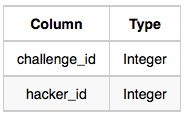

Sample Input 0

Hackers Table:
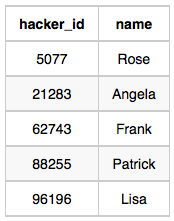

Challenges Table:
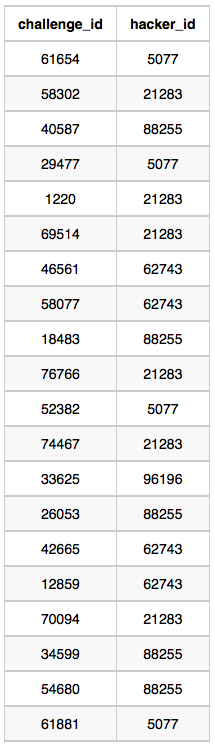

Sample Output 0

`21283 Angela 6
88255 Patrick 5
96196 Lisa 1`


Sample Input 1

Hackers Table:
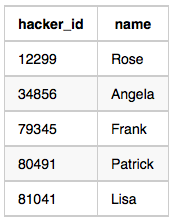

Challenges Table:
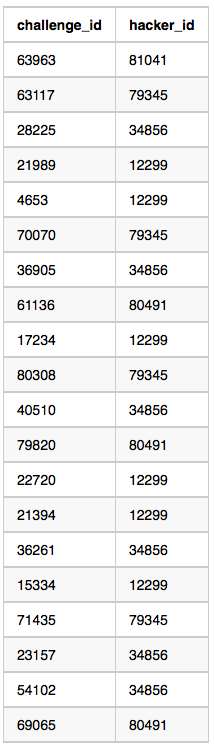

Sample Output 1

`12299 Rose 6
34856 Angela 6
79345 Frank 4
80491 Patrick 3
81041 Lisa 1`


Explanation

For Sample Case 0, we can get the following details:
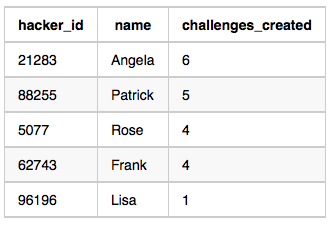


Students 5077 and 62743 both created 4 challenges, but the maximum number of challenges created is 6 so these students are excluded from the result.

For Sample Case 1, we can get the following details:
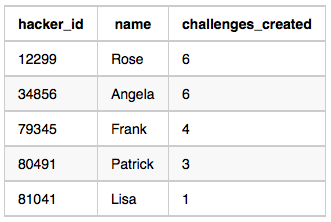

Students 12299 and 34856 both created 6 challenges. Because 6 is the maximum number of challenges created, these students are included in the result.

> `SELECT a.hacker_id, a.name, COUNT(b.hacker_id)    
FROM Hackers a, Challenges b
WHERE a.hacker_id = b.hacker_id
GROUP BY a.hacker_id,a.name
HAVING COUNT(b.hacker_id) NOT IN 
    (SELECT DISTINCT COUNT(hacker_id) 
     FROM Challenges
     WHERE hacker_id <> a.hacker_id
     GROUP BY hacker_id
     HAVING COUNT(hacker_id) < 
        (SELECT MAX(x.challenge_count)
         FROM (SELECT COUNT(b.challenge_id) AS challenge_count
               FROM Challenges b GROUP BY b.hacker_id) AS x ))
ORDER BY COUNT(b.hacker_id) DESC, a.hacker_id;`

***

You did such a great job helping Julia with her last coding contest challenge that she wants you to work on this one, too!

The total score of a hacker is the sum of their maximum scores for all of the challenges. Write a query to print the hacker_id, name, and total score of the hackers ordered by the descending score. If more than one hacker achieved the same total score, then sort the result by ascending hacker_id. Exclude all hackers with a total score of 0 from your result.

Input Format

The following tables contain contest data:

- Hackers: The hacker_id is the id of the hacker, and name is the name of the hacker.
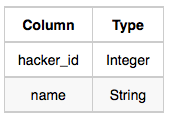

- Submissions: The submission_id is the id of the submission, hacker_id is the id of the hacker who made the submission, challenge_id is the id of the challenge for which the submission belongs to, and score is the score of the submission.
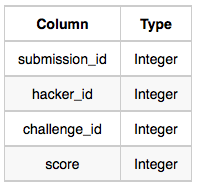

Sample Input

Hackers Table:
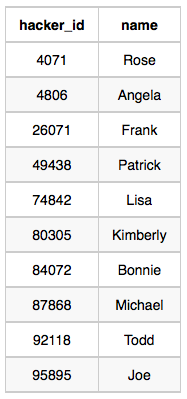

Submissions Table:
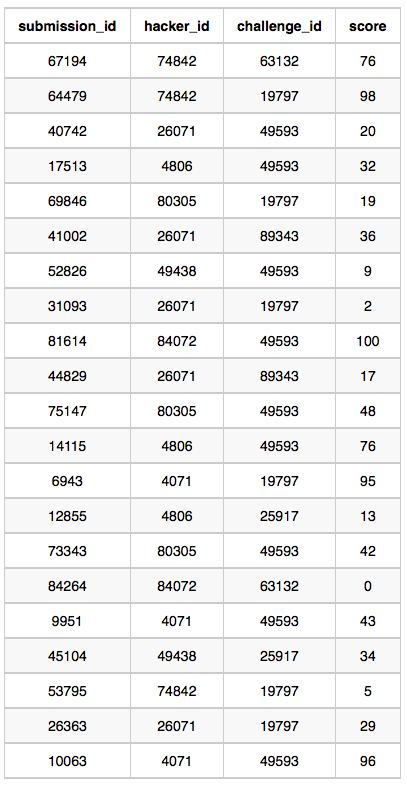

Sample Output

`4071 Rose 191
74842 Lisa 174
84072 Bonnie 100
4806 Angela 89
26071 Frank 85
80305 Kimberly 67
49438 Patrick 43`

Explanation

Hacker 4071 submitted solutions for challenges 19797 and 49593, so the total score = 95 + max(43, 96) = 191.

Hacker 74842 submitted solutions for challenges 19797 and 63132, so the total score = max(98, 5) + 76 = 174.

Hacker 84072 submitted solutions for challenges 49593 and 63132, so the total score = 100 + 0 = 100.

The total scores for hackers 4806, 26071, 80305, and 49438 can be similarly calculated.

> `SELECT h.hacker_id, name, SUM(score) AS total_score
FROM hackers AS h 
INNER JOIN
/* find max_score*/
(SELECT hacker_id,  MAX(score) AS score 
 FROM submissions 
 GROUP BY challenge_id, hacker_id) max_score

ON h.hacker_id = max_score.hacker_id
GROUP BY h.hacker_id, name

/* don't accept hackers with total_score = 0 */
HAVING total_score > 0

/* finally order as required */
ORDER BY total_score DESC, h.hacker_id;`

***

Samantha interviews many candidates from different colleges using coding challenges and contests. Write a query to print the contest_id, hacker_id, name, and the sums of total_submissions, total_accepted_submissions, total_views, and total_unique_views for each contest sorted by contest_id. Exclude the contest from the result if all four sums are 0.

Note: A specific contest can be used to screen candidates at more than one college, but each college only holds 1 screening contest.

Input Format

The following tables hold interview data:

- Contests: The contest_id is the id of the contest, hacker_id is the id of the hacker who created the contest, and name is the name of the hacker.
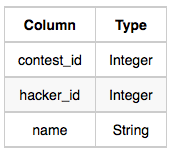

- Colleges: The college_id is the id of the college, and contest_id is the id of the contest that Samantha used to screen the candidates.
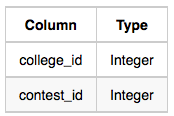

- Challenges: The challenge_id is the id of the challenge that belongs to one of the contests whose contest_id Samantha forgot, and college_id is the id of the college where the challenge was given to candidates.
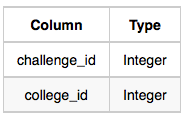

- View_Stats: The challenge_id is the id of the challenge, total_views is the number of times the challenge was viewed by candidates, and total_unique_views is the number of times the challenge was viewed by unique candidates.
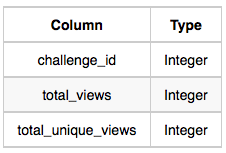

- Submission_Stats: The challenge_id is the id of the challenge, total_submissions is the number of submissions for the challenge, and total_accepted_submission is the number of submissions that achieved full scores.
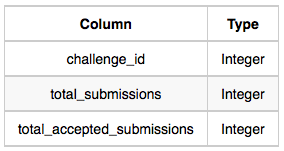

Sample Input

Contests Table:
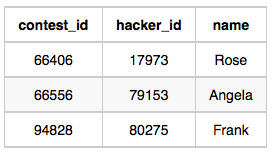

Colleges Table:
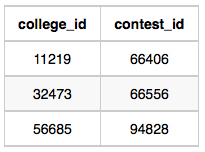

Challenges Table:
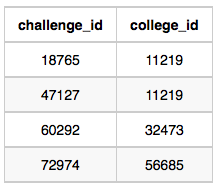

View_Stats Table:
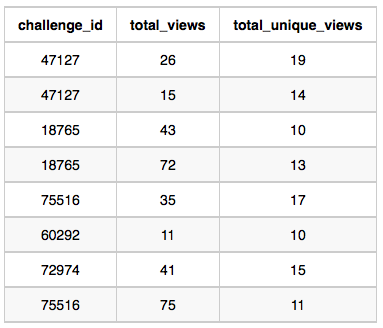

Submission_Stats Table:
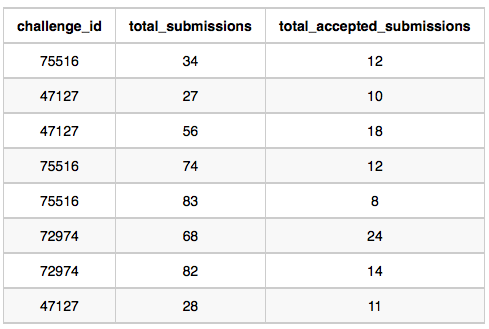


Sample Output

`66406 17973 Rose 111 39 156 56
66556 79153 Angela 0 0 11 10
94828 80275 Frank 150 38 41 15`

Explanation

The contest 66406 is used in the college 11219. In this college 11219, challenges 18765 and 47127 are asked, so from the view and submission stats:

Sum of total submissions = 27 + 56 + 28 = 111

Sum of total accepted submissions = 10 + 18 + 11 = 39

Sum of total views = 43 + 72 + 26 + 15 = 156

Sum of total unique views = 10 + 13 + 19 + 14 = 56

Similarly, we can find the sums for contests 66556 and 94828.

> `SELECT con.contest_id, 
    con.hacker_id, con.name, 
    SUM(sg.total_submissions), 
    SUM(sg.total_accepted_submissions), 
    SUM(vg.total_views), 
    SUM(vg.total_unique_views)
FROM Contests AS con
JOIN Colleges AS col ON con.contest_id = col.contest_id
JOIN Challenges AS cha ON cha.college_id = col.college_id
LEFT JOIN
    (SELECT ss.challenge_id, 
            SUM(ss.total_submissions) AS total_submissions,                     SUM(ss.total_accepted_submissions) AS total_accepted_submissions 
     FROM Submission_Stats AS ss 
     GROUP BY ss.challenge_id) AS sg
ON cha.challenge_id = sg.challenge_id
LEFT JOIN
    (SELECT vs.challenge_id, 
            SUM(vs.total_views) AS total_views,                                 SUM(vs.total_unique_views) AS total_unique_views
     FROM View_Stats AS vs  
     GROUP BY vs.challenge_id) AS vg
ON cha.challenge_id = vg.challenge_id
GROUP BY con.contest_id, con.hacker_id, con.name
HAVING SUM(sg.total_submissions) +
       SUM(sg.total_accepted_submissions) +
       SUM(vg.total_views) +
       SUM(vg.total_unique_views) > 0
ORDER BY con.contest_id;`


*** 

